# Analysis for Continuous Improvement

Author Name: Max Goetz

9-digit PID: 730465187

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. The course should offer an in depth look into how these concepts will be used in the future for computer science majors because it would be helpful for conceptual understanding for many of the students.
2. The course should have some videos exploring some of the basic tools needed for exercises for students to have if they are struggling. This would be beneficial for the instructors because they wouldn't have to spend as much time in office hours and tutoring.
3. The course should focus more on how some of these concepts can apply in the real world. This would help the workforce because students would instantly know how and where to apply their skills when they get a job.
4. The course should offer to analyze data for UNC to help the students get more practice and the university get valuable data analyzed quickly and for free.
5. The course should offer an in person option for Tuesday to help the students feel more attached to the class and material.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: The course should offer to analyze data for UNC to help students get more practice and the university to get valuable data analyzed.

2. Suggestion for how to collect data to support this idea in the future: Suggestion for how to collect data to support this idea in the future: Get the department head and computer science teachers to ask the chancellor and other important UNC staff if the university would want students to analyze data, and ask students if they would want to help analyze data from UNC.

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: The course should offer an in person option for Tuesday to help the students feel more attached to the class and material.

2. This idea is more valuable than the others brainstormed because: This idea is more valuable than the others brainstormed because: It helps us understand if the current system of online and in person lectures is ideal for teaching, or if only in person would work better. This could potentially have a huge impact on the students' understanding and enjoyment of the course.


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [2]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [2]:

from data_utils import read_csv_rows, head, columnar, select, count, convert, average

Next, I use the read_csv_rows function to sort the data into a form easy to work with. It also tells me how much data I am working with. 

In [3]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Columns names: {data_rows[0].keys()}")

620 rows
35 columns
Columns names: dict_keys(['row', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'ap_principles', 'ap_a', 'other_comp', 'prior_time', 'languages', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'flipped_class', 'no_hybrid', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])



From there, I use the columnar function to make the data easier to manipulate.

In [4]:

data_cols: dict[str, list[str]] = columnar(data_rows)


I want to have a greater understanding of the data before I start my analysis, so I use the head function to show me what a few of the rows look like. This allows me to identify the parts of the data I will need and how I should approach analyzing this data.

In [5]:

from tabulate import tabulate
data_cols_head: dict[str, list[str]] = head(data_cols, 5)
tabulate(data_cols_head, data_cols_head.keys(), "html")

row,year,unc_status,comp_major,primary_major,data_science,prereqs,prior_exp,ap_principles,ap_a,other_comp,prior_time,languages,hours_online_social,hours_online_work,lesson_time,sync_perf,all_sync,flipped_class,no_hybrid,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,pace,difficulty,understanding,interesting,valuable,would_recommend
0,22,Returning UNC Student,No,Mathematics,No,"MATH 233, MATH 347, MATH 381",7-12 months,No,No,UNC,1 month or so,"Python, R / Matlab / SAS",3 to 5 hours,0 to 2 hours,6,2,2,1,2,4,4,0,7,3,7,5,,,1,1,7,5,6,5
1,25,Returning UNC Student,No,Mathematics,Yes,"MATH 130, MATH 231, STOR 155",None to less than one month!,,,,,,0 to 2 hours,5 to 10 hours,4,3,3,1,2,6,4,5,5,5,5,5,7,6,6,6,3,4,6,4
2,25,Incoming First-year Student,Yes - BA,Computer Science,No,"MATH 130, MATH 152, MATH 210",None to less than one month!,,,,,,3 to 5 hours,5 to 10 hours,3,3,4,2,1,7,7,2,5,6,7,7,4,,6,4,6,7,7,7
3,24,Returning UNC Student,Yes - BS,Computer Science,Maybe,"MATH 231, MATH 232, STOR 155",2-6 months,No,No,High school course (IB or other),None to less than one month!,Python,3 to 5 hours,3 to 5 hours,5,5,4,3,3,6,5,1,6,3,5,5,5,4,4,4,5,6,6,6
4,25,Incoming First-year Student,Yes - BA,Computer Science,No,MATH 130,None to less than one month!,,,,,,0 to 2 hours,3 to 5 hours,7,3,3,3,2,6,3,5,6,6,6,6,7,3,6,5,5,6,6,7



I then sort the data from columnar, creating a new dictionary with only the values I need for my analysis.

In [6]:
asynch_data: dict[str, list[str]] = select(data_cols, ["sync_perf", "all_sync", "flipped_class", "no_hybrid", "own_notes", "own_examples", "oh_visits", "ls_effective", "lsqs_effective"])
course_data: dict[str, list[str]] = select(data_cols, ["pace", "difficulty", "understanding", "interesting", "valuable", "would_recommend"])


In this code, I use two functions I created to find the average response value of all the data I deemed important.

In [7]:
int_asynch_dict: dict[str, list[int]] = convert(asynch_data)
average_asynch_dict: dict[str, float] = average(int_asynch_dict)
print(average_asynch_dict)

int_course_dict: dict[str, list[int]] = convert(course_data)
average_course_dict: dict[str, float] = average(int_course_dict)
print(average_course_dict)

{'sync_perf': 3.0387096774193547, 'all_sync': 2.753225806451613, 'flipped_class': 2.988709677419355, 'no_hybrid': 2.108064516129032, 'own_notes': 5.696774193548387, 'own_examples': 4.817741935483871, 'oh_visits': 1.3064516129032258, 'ls_effective': 5.827419354838709, 'lsqs_effective': 5.382258064516129}
{'pace': 5.0209677419354835, 'difficulty': 4.383870967741935, 'understanding': 4.95483870967742, 'interesting': 5.970967741935484, 'valuable': 6.124193548387097, 'would_recommend': 5.853225806451613}



Finally, I plot the data so I can easily draw conclusions from the data about the effectiveness of having Tuesday be asynchronous.

<BarContainer object of 6 artists>

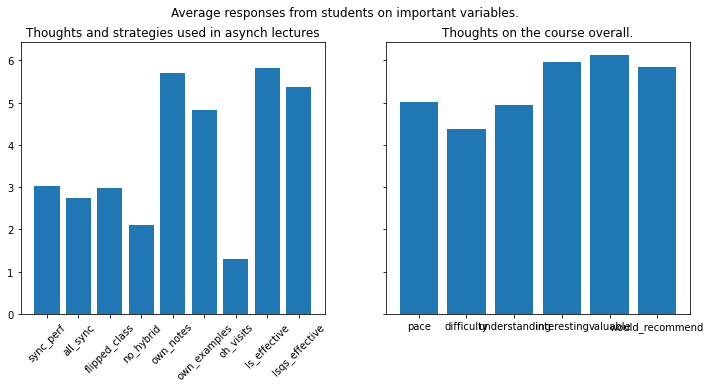

In [8]:

from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Average responses from students on important variables.")

axes[0].set_title("Thoughts and strategies used in asynch lectures")
axes[0].bar(average_asynch_dict.keys(), average_asynch_dict.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Thoughts on the course overall.")
axes[1].bar(average_course_dict.keys(), average_course_dict.values())


Just to be sure this system didn't have anyone truly stuggling because of it, I used the count function to check for understanding and difficulty ratings that were very low.

In [9]:

selected_data: dict[str, list[str]] = select(data_cols, ["understanding", "difficulty"])
low_understanding: dict[str, int] = count(selected_data["understanding"])
high_difficulty: dict[str, int] = count(selected_data["difficulty"])
print(f"Poor understanding: {low_understanding}")
print(f"High difficulty: {high_difficulty}")

Poor understanding: {'7': 74, '3': 68, '6': 182, '5': 172, '4': 82, '2': 28, '1': 14}
High difficulty: {'1': 23, '6': 88, '4': 160, '5': 155, '3': 84, '7': 56, '2': 54}


## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion




Part 5. Conclusion
When we analyze the data from the chart on overall thoughts on the course, we see a few things. First, students think the course moves pretty quickly and is somewhat difficult. Despite this, the average student really enjoys Comp 110. The average response for the valuable and interesting categories is very high, and students are very likely to recommend it to others. We also see that the average understanding is fairly high, even though the class is difficult. This means that the current setup must be working at least fairly well.

When we analyze the data from the chart on thoughts and strategies used in asynchronous lectures, we see that the average student slightly disagrees that their performance would improve if every lecture was synchronous with required attendence, and that this would not be preferable. We also see that the average student would not want to have to watch the videos for homework, and agrees with having a virtual option for every lecture. Most students tend to take notes on the lectures and work through examples to help their understanding. The average student also has rarely been to office hours, a good sign of comfort with the material. Finally, the average score on the effectiveness of the lesson videos and questions are very high. This also seems to lead us to the conclusion that the current set up is working well.

We saw that there were very few students who rated the course as very difficult or very hard to understand. Unfortunately, this number will probably never be 0, but we see that it is very low. This means we can safely assume that the current set up is doing a good enough job to keep almost everyone from struggling too much.

When we combine this data, we see that the average student enjoys Comp 110, thinks they are doing pretty well, likes having asynchronous lectures, and does not think this affects their grade in the class. While we cannot be completely confident that students would not benefit from having Tuesday lecture being in person based on this data, the average student thinks that they do not suffer from having the lecture be asynchronous. This evidence means that the average student would disagree with my hypothesis, and enjoys the current system.

If the proposed change were to be implemented, it could negatively affect students enjoyment and understanding of the course. The average student says that they like the current system, and it does not affect their understanding of the material, so a change in this system would probably be negative.

I still am not completely convinced that the average student would be harmed by a change, though. In order to understand this better, it would be nice to have grades from a 110 class that is in person for every lecture. That way, we could compare grades in one class to the other, and see if the average grade goes down, up, or stays the same when Tuesday lectures are in person. This would give the conclusion a little more validity.